<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week4_2_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##사이킷런
###**5. 데이터 전처리**
- 기본 사항 : 결손값, NaN, Null 값 처리 -> 고정된 다른 값으로 변환 / drop 처리
- 문자열 피처 : 카테고리형, 텍스트형 피처 의미 - 텍스트형은 피처 벡터화를 통해 처리

**데이터 인코딩**
- 레이블 인코딩 방식 : 카테고리 피처를 코드형 숫자값으로 변환

    Ex) 1.냉장고 2.전자레인지 3.컴퓨터
    
    - 구현 : LabelEncoder 클래스로 구현. fit()과 transform() 호출해서 레이블 인코딩 수행
    - 선형회귀와 같은 ML 알고리즘 적용 X, 트리 계열의 ML 알고리즘 O
- 원-핫 인코딩 : 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
    - 구현 : 사이킷런에서 OneHotEncoder 클래스로 변환가능, 2차원데이터 입력 필요, 변환값을 희소 행렬-> 밀집행렬 변환해야함. (toarray() 메서드 이용)
    - 판다스 API : *get_dummies() 이용* 시 바로 변환 가능
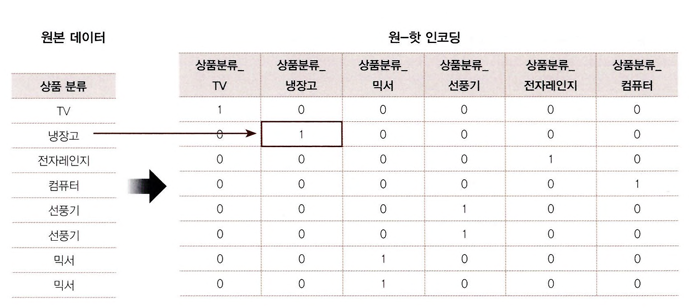


In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder= LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 2 2]


In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [4]:
#원핫인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#2차원 ndarray로 변환합니다.
items= np.array(items).reshape(-1,1)

#원-핫 인코딩을 적용합니다.
oh_encoder= OneHotEncoder()
oh_encoder.fit(items)
oh_labels= oh_encoder.transform(items)

#원-핫 인코딩 데이터를 밀집 행렬로 출력합니다.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
import pandas as pd

#데이터프레임 안에 중괄호{}로 문자열 카테고리 값 넣기
df= pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

###**피처 스케일링과 정규화**
: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 표준화 : 데이터와 피처 각각이 가우시안 정규 분포 가진 값으로 변환 Xn= X-mean(x) / std(x)
- 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기 변환 Yn= Y-min(y) / max(y)-min(y)

**StandardScaler**
: 표준화 클래스
- 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신이나 선형회귀, 로지스틱 회귀에서 필요 (정규분포 가정했기 때문)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris=load_iris()
iris_data=iris.data #데이터를 지정
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [5]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler= StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df) #데이터의 통계값 기억하는 과정-> 같은 스케일에서 비교하려고
iris_scaled= scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled= pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


###**MinMaxScaler**
: 데이터값을 0과 1 사이 범위 값으로 변환 (음수 존재 시 -1~1) -> 가우시안 분포 아닐 시 적용 가능
- Min, Max Scale 적용

In [6]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler= MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled= scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled= pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**
- StandardScaler, MinMaxScaler로 스케일링 변환 시 fit(), transform(), fit_transform() 메서드 이용
     
    -> 주의점 !! 학습 데이터 세트로 위 메서드 적용한 후 테스트 데이터 세트로는 fit()을 수행하지 않고 학습 데이터 세트로 fit() 수행 결과를 이용해 transform() 변환을 적용해야한다. (스케일링 기준 정보가 서로 달라지기 때문)
- fit_tranform() 이용해 스케일링 변환 시에도 테스트 데이터에서 사용하면 안됨

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1) #"행 = 데이터 개수", "열 = 특성 개수" 구조로 맞춰줌
test_array=np.arange(0,6).reshape(-1,1)

#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler= MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10->1 로 변환됨.
train_scaled= scaler.transform(train_array)

#다시 1차원으로 펴주기 flatten
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


이번에는 테스트 데이터 세트를 변환하는데, fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과를 확인해보자.

In [ ]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled= scaler.transform(test_array)

#test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

In [8]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled= scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야함.
test_scaled= scaler.transform(test_array) #fit()없이 바로
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


#6. 사이킷런으로 수행하는 타이타닉 생존자 예측


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df= pd.read_csv("/content/train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
print('\n### 학습 데이터 정보 ###\n')
print(titanic_df.info())

#object타입은 string으로 봐도 무방


### 학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
#Null 값 처리하기 - Age Cabin Embarked
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #True-> 원본 변형
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())
#sum 2번 -> 열 별로 + 총합 더함

데이터 세트 Null 값 갯수  0


/tmp/ipython-input-1670005641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #True-> 원본 변형
/tmp/ipython-input-1670005641.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [13]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

#Cabin 값이 특이함, 분류가 잘 안된듯

Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

Cabin 값 분포 :
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [14]:
# Cabin속성의 앞 문자만 추출하기
titanic_df['Cabin']= titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [16]:
#어떤 유형의 승객이 생존확률 높았을지 확인
#성별
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

#성별, 생존여부를 묶어서 Survived 컬럼의 결측치가 아닌 값 개수 센다.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

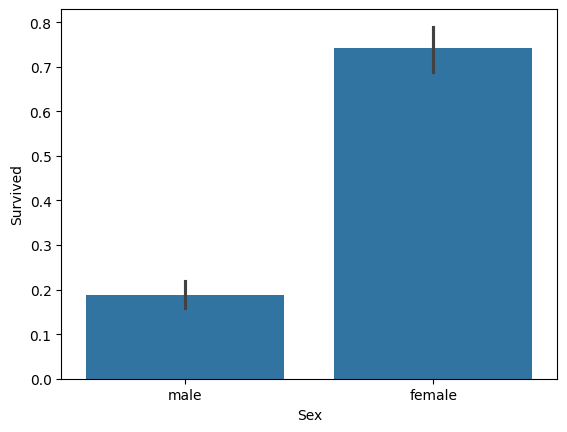

In [17]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

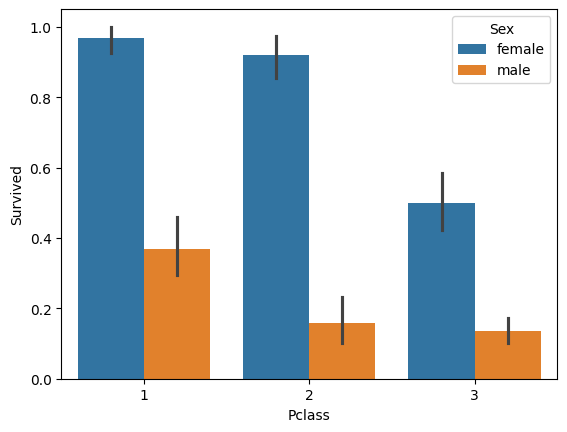

In [19]:
#부자와 가난한 사람 - 객실등급
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=titanic_df)

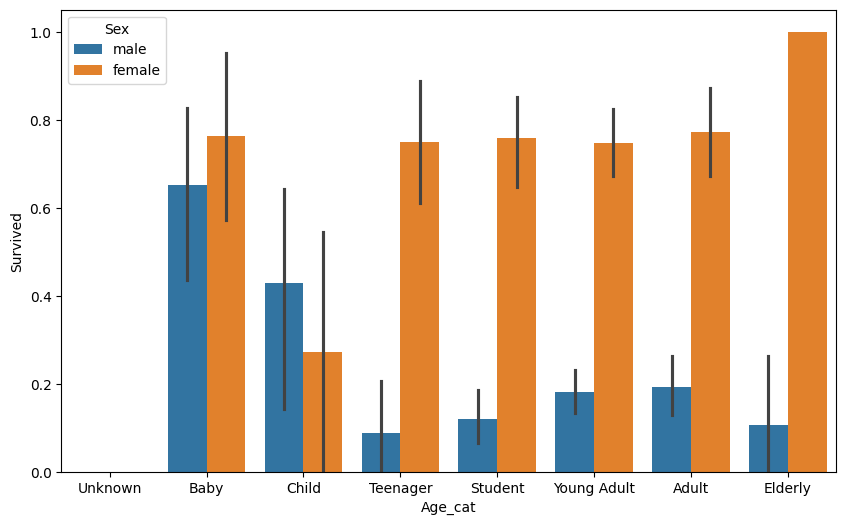

In [21]:
#나이 카테고리 분류
#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat=""
    if age<= -1: cat= 'Unknown'
    elif age<= 5: cat= 'Baby'
    elif age<=12: cat= "Child"
    elif age<=18: cat= 'Teenager'
    elif age<=25: cat= 'Student'
    elif age<= 35: cat= 'Young Adult'
    elif age<= 60: cat= 'Adult'
    else: cat= 'Elderly'

    return cat

#막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names= ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda식에 위에서 생성한 get_category()함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']= titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하기

    -> LabelEncoder 클래스로 레이블 인코딩 => 숫자 값으로 변환시킴

In [23]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le= LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]= le.transform(dataDF[feature])

    return dataDF

titanic_df= encode_features(titanic_df)
titanic_df.head(4)

#문자열 속성이 숫자형으로 바뀜

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3


- 전처리 호출 함수 - transform_features() + Null 처리, 피처 제거, 인코딩 수행하는 내부 함수들
- 불필요한 피처 제거 - drop_features(df)로 수행




In [26]:
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)

    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행 : 문자 -> 숫자형으로
def format_features(df):
    df['Cabin']= df['Cabin'].str[:1] #맨 앞 문자 가져오기
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le= LabelEncoder()
        le=le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df= fillna(df)
    df= drop_features(df)
    df= format_features(df)
    return df

In [27]:
#원본 데이터를 재로딩하고 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df= pd.read_csv("/content/train.csv")
y_titanic_df= titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1) #피처 데이터 세트 만들기

X_titanic_df= transform_features(X_titanic_df) #전처리 수행

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

/tmp/ipython-input-1273048322.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1273048322.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

사이킷런 기반의 머신러닝 코드
- 결정트리 : DecisionTreeClassifier
- 랜덤포레스트 : RandomForestClassifier
- 로지스틱 회귀 : LogisticRegression
  - 생성인자 solver='liblinear'는 최적화 알고리즘을 liblinear로 설정하는 것 (작은 데이터 셋에서 이진분류 시 성능 좋음)

  => train_test_split() 으로 학습, 테스트 데이터 분리
  
  => 예측 평가는 accuracy_score() API사용

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf= DecisionTreeClassifier(random_state=11)
rf_clf= RandomForestClassifier(random_state=11)
lr_clf= LogisticRegression(solver='liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred= dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred= rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred= lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


**교차검증**
- 결정트리 모델 평가
- KFold, cross_val_score(), GridSearchCV 클래스 사용

In [35]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold= KFold(n_splits=folds)
    scores=[]

    #KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test= X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test= y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions= clf.predict(X_test)
        accuracy= accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    #5개 fold에서의 평균 정확도 계산.
    mean_score= np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [37]:
#cross_val_score()로 교차검증
from sklearn.model_selection import cross_val_score

scores= cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1: .4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도:  0.7430
교차 검증 1 정확도:  0.7753
교차 검증 2 정확도:  0.7921
교차 검증 3 정확도:  0.7865
교차 검증 4 정확도:  0.8427
평균 정확도: 0.7879


>GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해 보자.

>CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_
samples_split, min_samples_leaf를 변경하면서 성능을 측정한다.

>최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력해보자.

In [38]:
#GridSearchCV 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터 찾고 예측 성능 측정
#하이퍼 파라미터 - max_depth, min_samples_split, min_samples_leaf 변경하며 성능측정

from sklearn.model_selection import GridSearchCV

parameters= {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

grid_dclf= GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf= grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions= best_dclf.predict(X_test)
accuracy= accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
